## Text Classification using SVM

### Libraries

In [10]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np

### Create a simple dataset then split for training and testing

In [11]:
# Expanded sample text data
texts = [
    "I love this movie, it was great",
    "Terrible film, I hated it",
    "Amazing story and acting",
    "Worst movie ever, complete waste of time",
    "Brilliant director and excellent plot",
    "So boring and predictable",
    "Great acting and great story",
    "I hated this boring movie",
    "Excellent plot and great directing",
    "Complete waste of time and money",
    "Loved the brilliant performance",
    "Predictable story, boring direction",
    "The film was amazing and the plot was excellent",
    "Terrible acting and bad story",
    "A very predictable movie, nothing new",
    "Great story, great film, I loved it"
]
labels = [1, 0, 1, 0, 1, 0, 
          1, 0, 1, 0, 1, 0, 
          1, 0, 0, 1]  # 1: positive, 0: negative

# Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    texts, labels, test_size=0.3, random_state=42
)

### Conver text to numerical

In [12]:
# Step 1: Convert text to numerical features using TF-IDF
vectorizer = TfidfVectorizer(
    max_features=1000,  # Limit vocabulary size
    min_df=2,           # Minimum document frequency
    stop_words='english'  # Remove common words
)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


### train and evaluate the model

In [13]:
# Step 2: Train SVM model (linear kernel works best for text)
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_tfidf, y_train)

# Evaluate
y_pred = svm_model.predict(X_test_tfidf)
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))


              precision    recall  f1-score   support

    Negative       1.00      0.50      0.67         4
    Positive       0.33      1.00      0.50         1

    accuracy                           0.60         5
   macro avg       0.67      0.75      0.58         5
weighted avg       0.87      0.60      0.63         5



In [16]:
# Extract important features
def show_important_features(model, vectorizer, n=10):
    import numpy as np

    # Get feature names
    feature_names = vectorizer.get_feature_names_out()
    
    # Convert coefficients to dense NumPy array
    coefficients = model.coef_.toarray()[0]  # now it's a 1D NumPy array
    
    # Get top positive and negative features
    top_positive_idx = np.argsort(coefficients)[-n:]
    top_negative_idx = np.argsort(coefficients)[:n]
    
    print("Top positive features:")
    for idx in reversed(top_positive_idx):
        print(f"{feature_names[idx]}: {coefficients[idx]:.4f}")
    
    print("\nTop negative features:")
    for idx in top_negative_idx:
        print(f"{feature_names[idx]}: {coefficients[idx]:.4f}")

show_important_features(svm_model, vectorizer)


Top positive features:
acting: 0.6223
amazing: 0.6116
great: 0.5978
brilliant: 0.5830
loved: 0.5437
plot: 0.3911
excellent: 0.3911
film: 0.2530
story: 0.0700
movie: -0.4886

Top negative features:
boring: -1.2131
complete: -0.6390
time: -0.6390
waste: -0.6390
movie: -0.4886
story: 0.0700
film: 0.2530
excellent: 0.3911
plot: 0.3911
loved: 0.5437


### plot the features

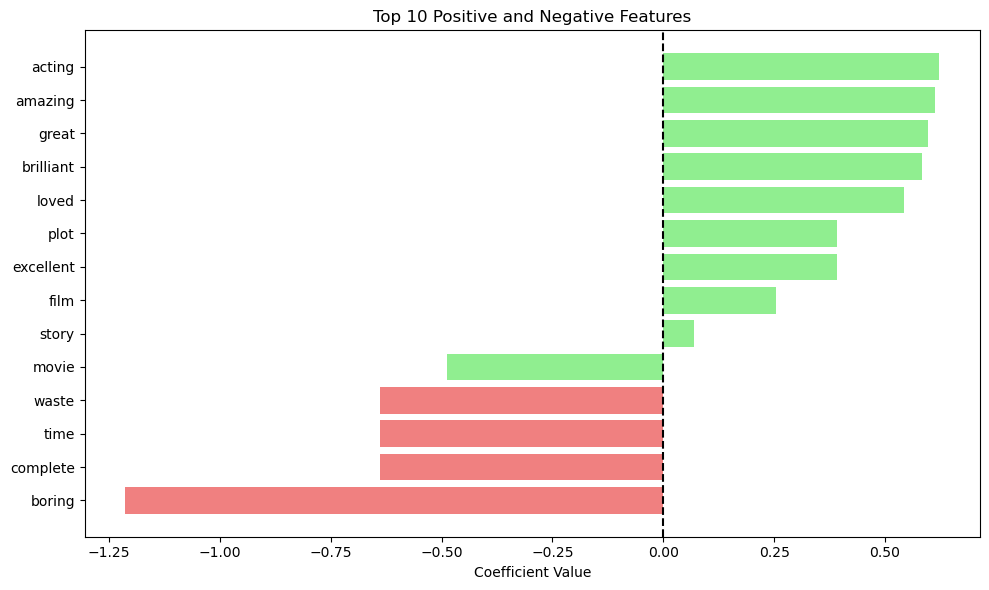

In [18]:
import matplotlib.pyplot as plt

def plot_important_features(model, vectorizer, n=10):
    # Get feature names
    feature_names = vectorizer.get_feature_names_out()

    # Convert sparse coefficients to dense array
    coefficients = model.coef_.toarray()[0]

    # Get top positive and negative indices
    top_positive_idx = np.argsort(coefficients)[-n:]
    top_negative_idx = np.argsort(coefficients)[:n]

    # Combine the indices
    top_indices = np.concatenate([top_negative_idx, top_positive_idx])
    top_features = feature_names[top_indices]
    top_coefficients = coefficients[top_indices]

    # Color coding: red for negative, green for positive
    colors = ['lightcoral'] * n + ['lightgreen'] * n

    # Plot
    plt.figure(figsize=(10, 6))
    plt.barh(top_features, top_coefficients, color=colors)
    plt.xlabel("Coefficient Value")
    plt.title(f"Top {n} Positive and Negative Features")
    plt.axvline(0, color='black', linestyle='--')
    plt.tight_layout()
    plt.show()

# Example usage:
plot_important_features(svm_model, vectorizer, n=10)
